In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
import seaborn as sns

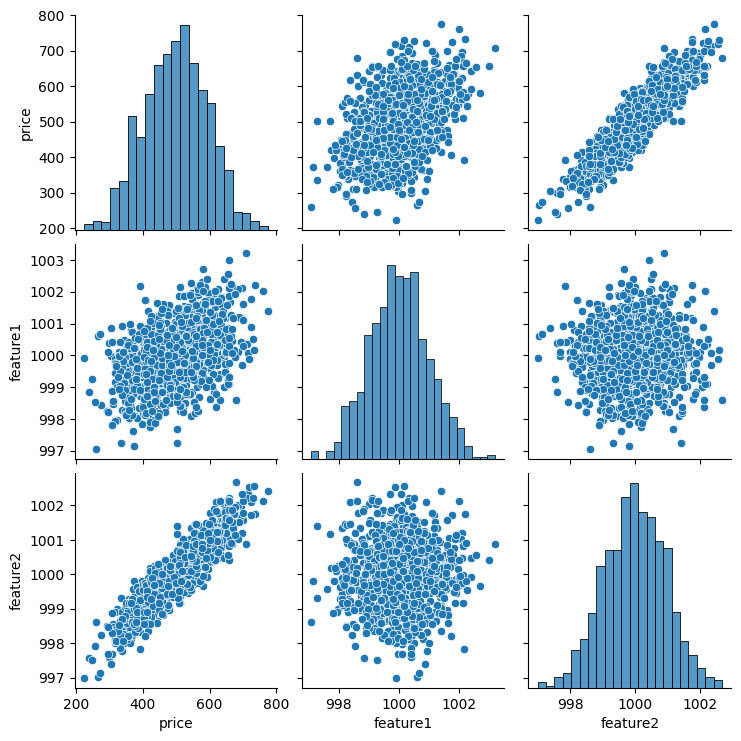

In [2]:
df = pd.read_csv('fake_reg.csv')
sns.pairplot(df)

In [3]:
X = df[['feature1', 'feature2']].values
y = df['price'].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [5]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [6]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
model = Sequential([Dense(4, activation='relu'),
                    Dense(2, activation='relu'),
                    Dense(1)])
model.compile(optimizer='rmsprop', loss='mse')

In [16]:
model.fit(x=X_train, y=y_train, epochs=500)

Epoch 1/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 255991.1562  
Epoch 2/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 263794.5938 
Epoch 3/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 257881.9844 
Epoch 4/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 258200.5469 
Epoch 5/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 252309.9844 
Epoch 6/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 258693.8750 
Epoch 7/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 257710.4219 
Epoch 8/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 253991.4062 
Epoch 9/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 257348.8906 
Epoch 10/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 261622.7188 
Epoch 11/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 257661.3750 
Epoch 12/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 258598.1250 
Epoch 13/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 258650.8906 
Epoch 14/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss:

In [17]:
model.evaluate(X_test, y_test, verbose=0)

22.075719833374023

In [18]:
test_predictions = model.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(300,))


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [19]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

In [20]:
pred_df

,Test True Y,Model Predictions
0,516.662050,510.861206
1,514.881741,512.014221
2,531.929088,530.791321
3,420.238901,419.992340
4,511.193757,511.035797
...,...,...
295,435.261553,431.754211
296,397.620596,403.552094
297,492.935919,491.379517
298,478.080303,472.195648


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

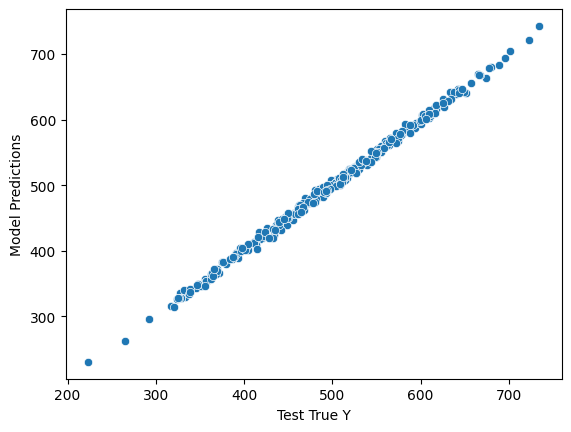

In [21]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [23]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

3.766187703847393

In [24]:
new_gem = [[998, 1000]]

In [25]:
new_gem = scaler.transform(new_gem)

In [26]:
model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[419.69656]], dtype=float32)

In [27]:
model.save('my_gem_model.h5')